In [1]:
import sys
import pandas as pd
import numpy as np
import os


# Add the scripts folder to the Python path
sys.path.append(os.path.abspath(".."))
from scripts.txt_to_csv import convert_txt_to_csv

In [2]:
file_path='../Data/Data.csv'
df=pd.read_csv(file_path)

print(df.info())  # Check the data types
print(df.describe())  # Summary statistics


C:\Users\User\AppData\Local\Temp\ipykernel_21992\223752527.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

Exploratory Data Analysis (EDA)

In [3]:
df[['TotalPremium', 'TotalClaims']].describe()


,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


In [4]:

df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

                          Missing Values  Missing Percentage
NumberOfVehiclesInFleet          1000098          100.000000
CrossBorder                       999400           99.930207
CustomValueEstimate               779642           77.956560
Rebuilt                           641901           64.183810
Converted                         641901           64.183810
WrittenOff                        641901           64.183810
NewVehicle                        153295           15.327998
Bank                              145961           14.594670
AccountType                        40232            4.022806
Gender                              9536            0.953507
MaritalStatus                       8259            0.825819
VehicleType                          552            0.055195
make                                 552            0.055195
mmcode                               552            0.055195
Model                                552            0.055195
Cylinders               

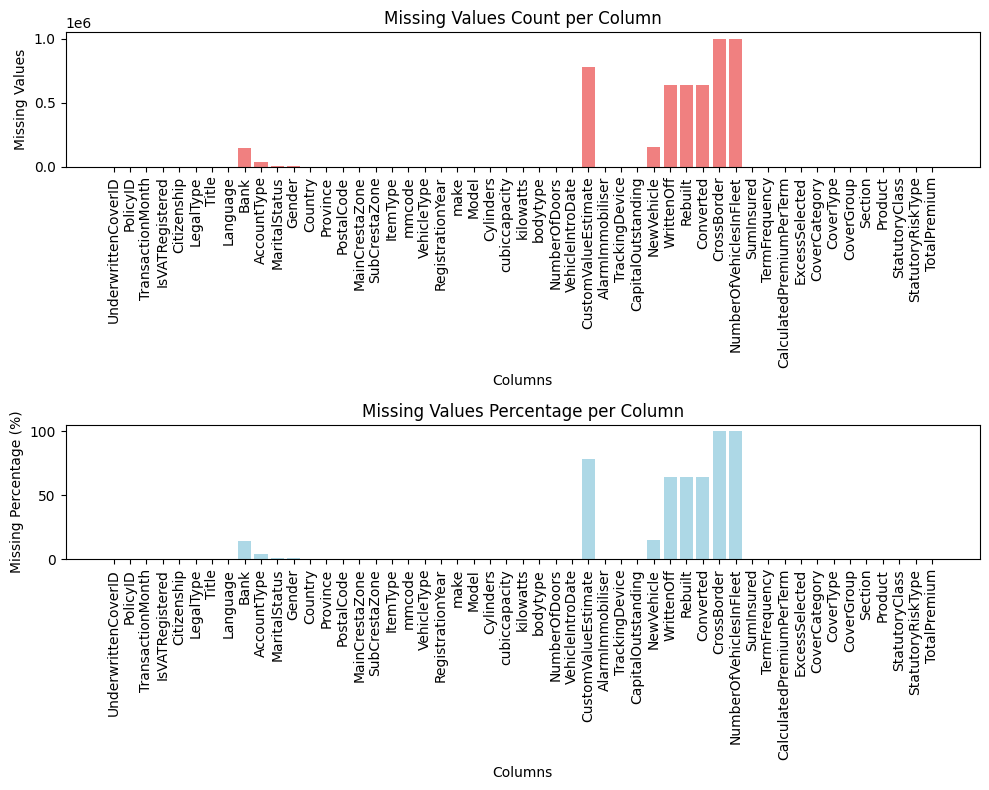

In [5]:
from scripts.data_analysis import missing_value

missing_value(df)

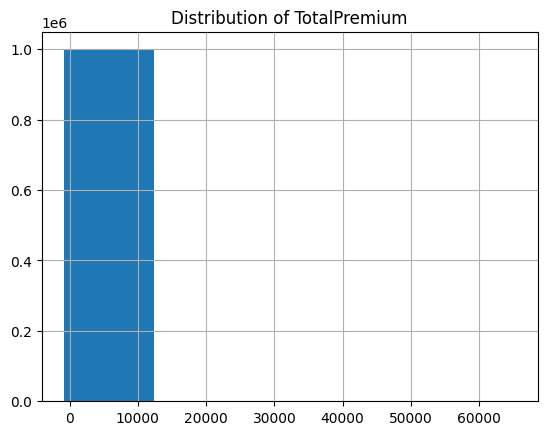

In [6]:
import matplotlib.pyplot as plt
df['TotalPremium'].hist(bins=5)
plt.title('Distribution of TotalPremium')
plt.show()


c:\Users\User\Desktop\Week3-insurance-Data-Analysis\myenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


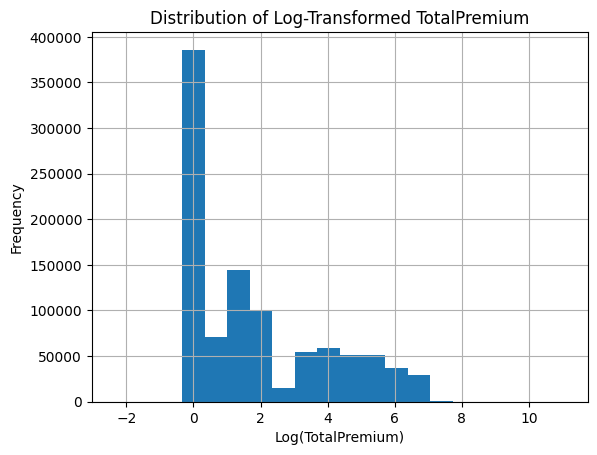

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Apply logarithmic transformation
df['Log_TotalPremium'] = np.log1p(df['TotalPremium'])

# Plot the log-transformed histogram
df['Log_TotalPremium'].hist(bins=20)
plt.title('Distribution of Log-Transformed TotalPremium')
plt.xlabel('Log(TotalPremium)')
plt.ylabel('Frequency')
plt.show()


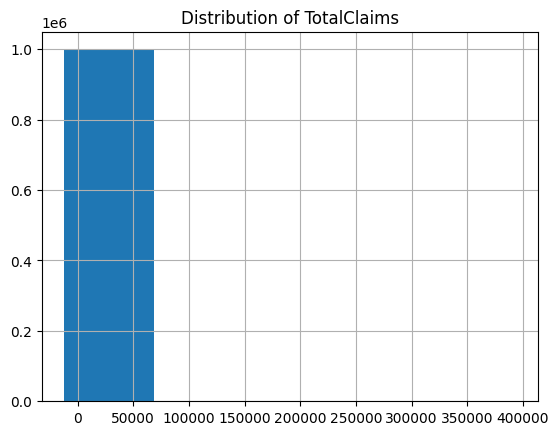

In [11]:
import matplotlib.pyplot as plt
df['TotalClaims'].hist(bins=5)
plt.title('Distribution of TotalClaims')
plt.show()


c:\Users\User\Desktop\Week3-insurance-Data-Analysis\myenv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


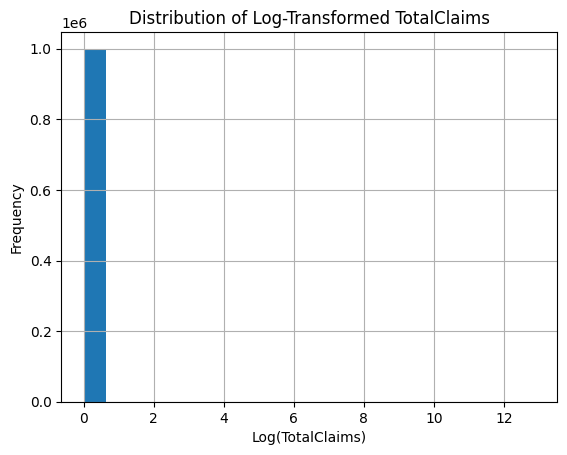

In [15]:
df['Log_TotalClaims'] = np.log1p(df['TotalClaims'])

# Plot the log-transformed histogram
df['Log_TotalClaims'].hist(bins=20)
plt.title('Distribution of Log-Transformed TotalClaims')
plt.xlabel('Log(TotalClaims)')
plt.ylabel('Frequency')
plt.show()


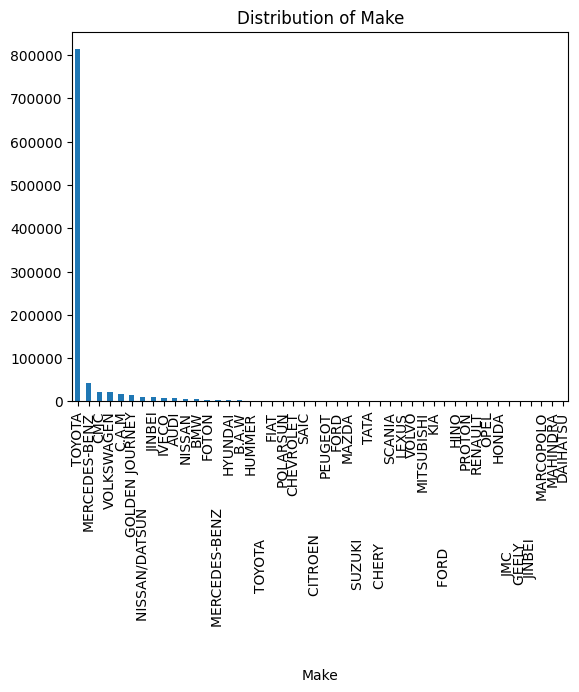

In [7]:
import matplotlib.pyplot as plt
# Plot the bar chart
df['make'].value_counts().plot(kind='bar')

# Add title and labels
plt.title('Distribution of Make')
plt.xlabel('Make', labelpad=30)

# Show the plot
plt.show()




Bivariate or Multivariate Analysis

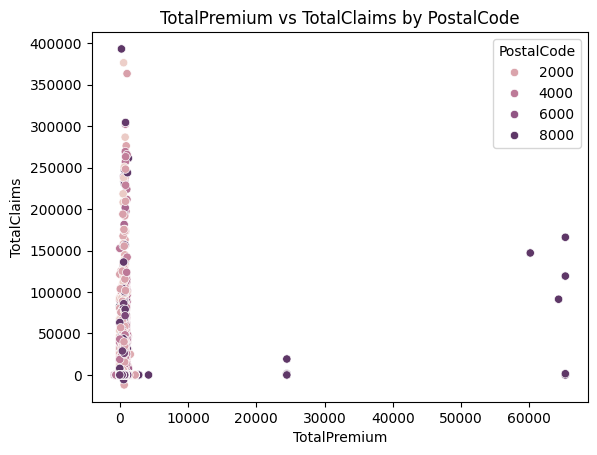

In [19]:
# import seaborn as sns
# sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='ZipCode', data=df)
# plt.title('TotalPremium vs TotalClaim by ZipCode')
# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Use the correct column name 'PostalCode' instead of 'ZipCode'
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=df)

# Add title to the plot
plt.title('TotalPremium vs TotalClaims by PostalCode')

# Show the plot
plt.show()


Correlation Matrix:

In [18]:
corr = df[['TotalPremium', 'TotalClaims', 'Cylinders']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


NameError: name 'sns' is not defined

Data Comparison:

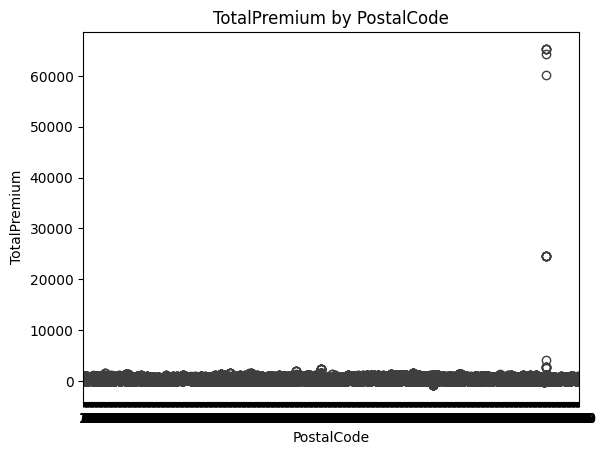

In [20]:
sns.boxplot(x='PostalCode', y='TotalPremium', data=df)
plt.title('TotalPremium by PostalCode')
plt.show()


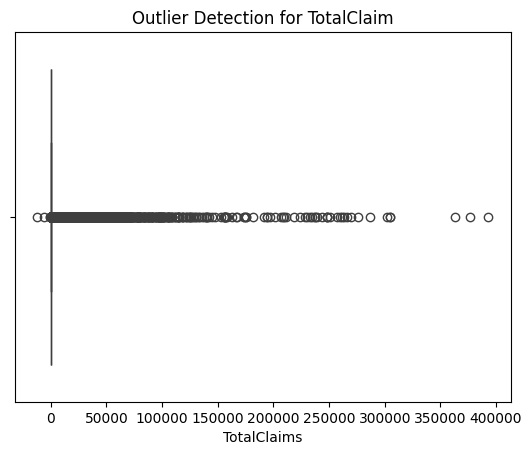

In [21]:
sns.boxplot(x=df['TotalClaims'])
plt.title('Outlier Detection for TotalClaim')
plt.show()


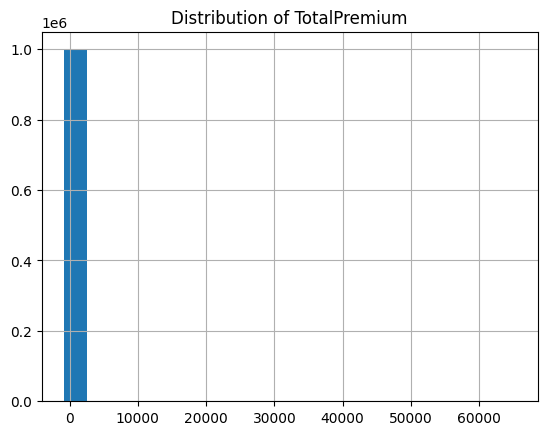

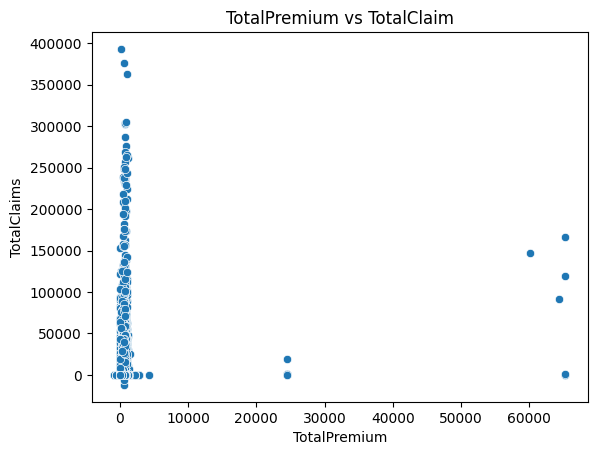

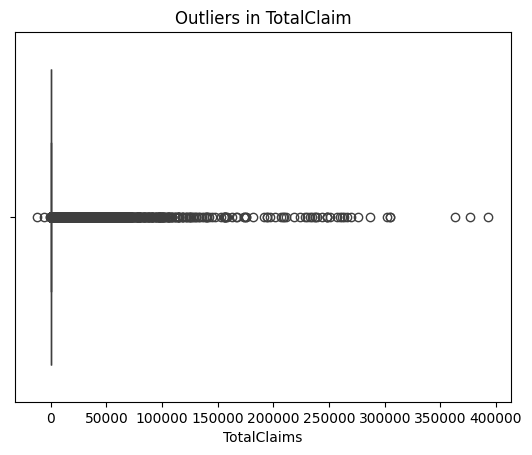

In [23]:
# Plot 1: Histogram for TotalPremium
df['TotalPremium'].hist(bins=20)
plt.title('Distribution of TotalPremium')
plt.show()

# Plot 2: Scatter plot for TotalPremium vs TotalClaim
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title('TotalPremium vs TotalClaim')
plt.show()

# Plot 3: Boxplot for TotalClaim to check for outliers
sns.boxplot(x=df['TotalClaims'])
plt.title('Outliers in TotalClaim')
plt.show()


In [9]:
print("Total Claims:", df['TotalClaims'].sum())
print("Total Premium:", df['TotalPremium'].sum())


Total Claims: 64867546.17070174
Total Premium: 61911562.69643226
